## Goal of this notebook

It might be possible that low scores are due to less pre-processing. So I would like to try
PCA on the entire dataset to see whether this would produce better accuracy scores.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import (confusion_matrix, 
                             plot_confusion_matrix, accuracy_score,
                             classification_report)
np.random.seed(73)

In [2]:
df=pd.read_csv('../data/Vectorised_Data.csv')#read vectorised df
df.head()

,is_sarcastic,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len,abort,abus,accept,...,CCONJ_proportion,NUM_proportion,PUNCT_proportion,X_proportion,AUX_proportion,ADV_proportion,VERB_proportion,PART_proportion,PROPN_proportion,NOUN_proportion
0,0.0,12.0,12.0,78.0,2.0,2.0,5.583333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.100000,0.0,0.000000,0.500000
1,0.0,14.0,14.0,84.0,6.0,3.0,5.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.125,0.000000,0.0,0.625000,0.125000
2,1.0,14.0,13.0,79.0,4.0,1.0,4.714286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.222222,0.0,0.333333,0.333333
3,1.0,13.0,13.0,84.0,5.0,2.0,5.538462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.333333,0.0,0.111111,0.444444
4,0.0,11.0,11.0,64.0,3.0,2.0,4.909091,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000,0.142857,0.0,0.428571,0.428571


In [3]:
print(df.shape) #shape
df.isnull().sum().sum()#nulls

(26147, 1023)


0

## train test split

In [4]:
y = df.is_sarcastic
X = df[[cols for cols in df.columns if cols != "is_sarcastic"]]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.20, stratify=y)

## Standard Scaling

In [6]:
# initialize
ss = StandardScaler()

# fit on Train
X_train_ss = pd.DataFrame(ss.fit_transform(X_train),
                          columns = X_train.columns,
                          index = X_train.index)

# transform test
X_test_ss = pd.DataFrame(ss.transform(X_test),
                         columns = X_test.columns,
                         index = X_test.index)

## PCA on all columns

In [7]:
#pca fit on standard scaled X_train
pca = PCA().fit(X_train_ss)

In [8]:
# to see how each new column explains the variance
for i, l in enumerate(pca.explained_variance_):
    print('PC {}: {:.2f} --> {:.2f}%'.format(i, l,
                                             l * 100 / sum(pca.explained_variance_)))

PC 0: 3.56 --> 0.35%
PC 1: 3.38 --> 0.33%
PC 2: 2.99 --> 0.29%
PC 3: 2.95 --> 0.29%
PC 4: 2.93 --> 0.29%
PC 5: 2.87 --> 0.28%
PC 6: 2.78 --> 0.27%
PC 7: 2.69 --> 0.26%
PC 8: 2.57 --> 0.25%
PC 9: 2.50 --> 0.24%
PC 10: 2.44 --> 0.24%
PC 11: 2.41 --> 0.24%
PC 12: 2.40 --> 0.23%
PC 13: 2.36 --> 0.23%
PC 14: 2.35 --> 0.23%
PC 15: 2.34 --> 0.23%
PC 16: 2.28 --> 0.22%
PC 17: 2.25 --> 0.22%
PC 18: 2.22 --> 0.22%
PC 19: 2.18 --> 0.21%
PC 20: 2.10 --> 0.21%
PC 21: 2.09 --> 0.20%
PC 22: 1.97 --> 0.19%
PC 23: 1.93 --> 0.19%
PC 24: 1.90 --> 0.19%
PC 25: 1.86 --> 0.18%
PC 26: 1.83 --> 0.18%
PC 27: 1.78 --> 0.17%
PC 28: 1.77 --> 0.17%
PC 29: 1.77 --> 0.17%
PC 30: 1.75 --> 0.17%
PC 31: 1.73 --> 0.17%
PC 32: 1.73 --> 0.17%
PC 33: 1.70 --> 0.17%
PC 34: 1.68 --> 0.16%
PC 35: 1.66 --> 0.16%
PC 36: 1.66 --> 0.16%
PC 37: 1.64 --> 0.16%
PC 38: 1.63 --> 0.16%
PC 39: 1.63 --> 0.16%
PC 40: 1.62 --> 0.16%
PC 41: 1.61 --> 0.16%
PC 42: 1.61 --> 0.16%
PC 43: 1.60 --> 0.16%
PC 44: 1.59 --> 0.16%
PC 45: 1.58 --> 0.16

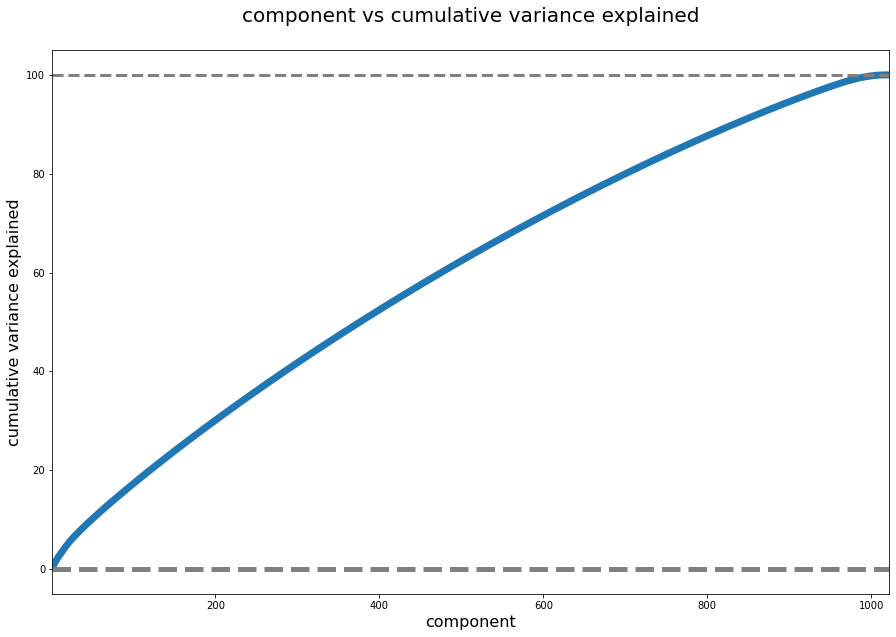

In [9]:
#component vs cumulative variance explained
cum_var_exp = np.cumsum(pca.explained_variance_ratio_) * 100
plt.figure(figsize=(15,10))
component_number = range(1, 1023)
plt.plot(component_number, cum_var_exp, lw=7)
plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')
ax = plt.gca()
ax.set_xlim([1,1022])
ax.set_ylim([-5,105])
ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)  
ax.set_title('component vs cumulative variance explained\n', fontsize=20);

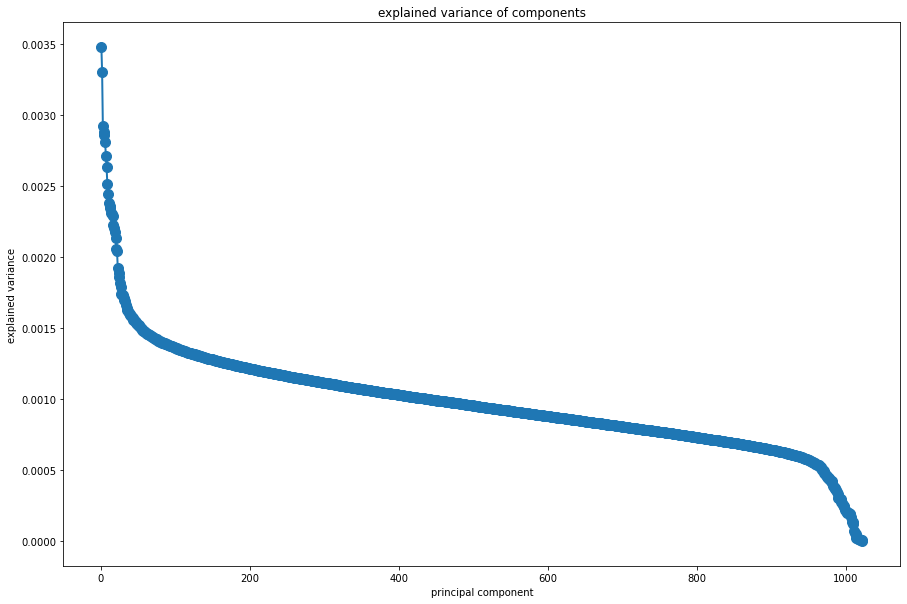

In [10]:
#explained variance of components
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(range(1,1023), pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1,1023), pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance');

**Observations:** 

- We can't really choose some of the specific features here as individual  
  explained variance is really small.
- So will use entire PCAed dataframe to run a RandomForest model.

In [11]:
#pca_df_train-> train dataframe after pca transformation
pca_df_train = pd.DataFrame(pca.transform(X_train_ss),
                      columns=['pc_' + str(i) for i in range(1022)])
pca_df_train.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_1012,pc_1013,pc_1014,pc_1015,pc_1016,pc_1017,pc_1018,pc_1019,pc_1020,pc_1021
0,1.235108,1.358653,-1.543956,-0.261092,-0.694621,-0.359699,-0.436728,0.068792,0.077257,0.883423,...,-0.219579,-0.014782,-0.003350,0.012758,0.006040,0.007038,-0.021375,-0.017968,-0.000205,5.388263e-16
1,-1.891743,0.033947,-0.041783,-0.019258,0.090324,0.334827,0.589578,-0.237725,-0.084214,-0.858029,...,-0.010440,0.009670,-0.004074,0.043201,0.003678,-0.008829,0.002540,-0.025087,-0.004316,1.912687e-16
2,0.528580,3.164987,0.685711,-0.092032,1.639596,0.772620,-0.592008,-3.489061,-0.780890,0.643827,...,-0.001429,0.012466,0.022138,-0.071474,-0.058307,0.000329,-0.002490,-0.022745,-0.000838,4.496791e-16
3,-0.460645,-1.181725,-0.380344,0.010036,0.110929,-0.353355,-0.302709,0.172790,0.080750,0.104276,...,-0.005596,0.005031,-0.022917,0.035230,-0.005255,-0.000769,-0.006900,-0.044195,-0.001086,-1.804831e-16
4,-0.057446,-1.466430,-0.288941,-0.312461,-0.039252,-0.177162,-0.281249,0.258952,-0.047511,0.427285,...,0.006164,0.021777,0.002318,-0.001806,0.002197,-0.013003,-0.002260,-0.054651,0.000248,-1.674663e-15


In [12]:
##pca_df_test-> test dataframe after pca transformation
pca_df_test = pd.DataFrame(pca.transform(X_test_ss),
                      columns=['pc_' + str(i) for i in range(1022)])
pca_df_test.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_1012,pc_1013,pc_1014,pc_1015,pc_1016,pc_1017,pc_1018,pc_1019,pc_1020,pc_1021
0,-3.179068,0.928287,0.343441,0.122679,-0.380612,0.074647,0.469838,0.234099,0.029086,-1.066118,...,0.003127,0.030826,0.017605,0.411977,0.005061,-0.021946,-0.008654,0.215240,0.003369,-2.246817e-17
1,-3.764513,1.006650,0.201741,0.977781,-0.331714,0.814223,0.041891,0.184149,-0.288508,-0.783116,...,0.057399,-0.024749,0.003359,0.051594,0.022989,0.028549,-0.005980,0.030035,0.001822,9.135280e-16
2,-1.999031,-0.505262,-0.197599,-0.249624,-0.016014,0.450294,-0.180542,0.580041,0.125484,-0.483233,...,0.014415,0.014364,0.018470,0.158373,0.006198,-0.001243,0.008701,0.058208,-0.001002,7.295394e-16
3,-2.673960,-0.535695,-0.224137,0.365927,0.182674,-0.128280,0.173136,0.454422,0.543803,-0.822229,...,0.003931,-0.126278,-0.002897,-0.084534,-0.004521,0.011726,0.001193,-0.038721,-0.020408,3.467526e-16
4,2.370949,-1.626765,-0.395723,-0.310338,0.095850,-0.388632,-0.268741,0.246459,0.411388,-0.433685,...,0.033135,0.027948,0.025616,0.213819,0.006763,-0.010045,0.000821,0.057072,-0.017857,-6.322357e-16


In [13]:
#to check for data integrity before modeling
print('Nulls in training data: {}'.format(pca_df_train.isnull().sum().sum()))
print('Nulls in test data: {}'.format(pca_df_test.isnull().sum().sum()))

Nulls in training data: 0
Nulls in test data: 0


## Model

In [14]:
def rfscore2(X_train, X_test, y_train, y_test,n_estimators,max_depth):
   
    '''Gridsearching RandomForest'''
    
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Random Forest', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    disp = plot_confusion_matrix(best_rf_gs, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    print("Confusion matrix:\n%s" % disp.confusion_matrix)
    plt.show();

    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return

In [15]:
def score(model, name, X, y):
    '''Cross val score for specific model, df and target with stratification'''
    cv = StratifiedKFold(n_splits=10,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

Fitting 5 folds for each of 91 candidates, totalling 455 fits
GridSearch results
The best parameters on the training data are:
 {'max_depth': 13, 'n_estimators': 130}
best max_depth: 13
best n_estimators: 130
Random Forest Score: 0.57 +- 0.008



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[2833  136]
 [2039  222]]


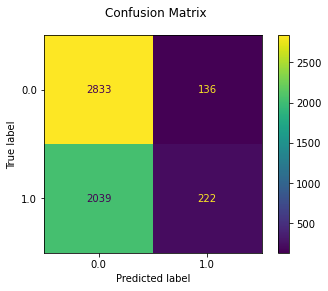

              precision    recall  f1-score   support

         0.0       0.58      0.95      0.72      2969
         1.0       0.62      0.10      0.17      2261

    accuracy                           0.58      5230
   macro avg       0.60      0.53      0.45      5230
weighted avg       0.60      0.58      0.48      5230

0.5841300191204589
Features and their importance:

AxesSubplot(0.125,0.125;0.775x0.755)


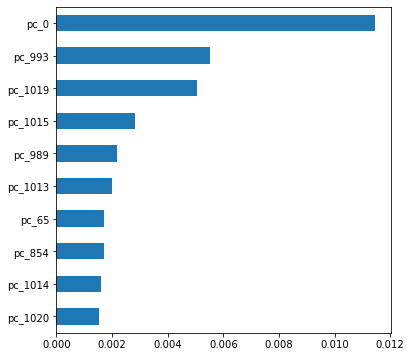

In [16]:
#running model with parameters
n_estimators = list(range(10,150,20))
max_depth = list(range(1, 27, 2)) 
rfscore2(pca_df_train, pca_df_test, y_train, y_test,n_estimators,max_depth)

## Conclusion

- The accuracy is at 58% which is just 2% above the baseline. So PCA does not 
  really help here.

## Way Forward

- What I really need is a model which understands the context. Hence I would like   to model BERT on the headlines data.